In [1]:
import os
import sys
sys.path.insert(0, './utils/')
from utils import load_data, normalize_data, format_data, split_data
from utils import train_model, fake_test_data, forecast, forecast_analysis, experiment

In [2]:
# https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, TimeDistributed, Reshape, Flatten, Dropout, BatchNormalization
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from copy import copy
from tensorflow.keras import backend as K
from sklearn import preprocessing
import tensorflow.keras.optimizers as optimizers
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

## Separate splits

## Model with Autoregressive MLP

W1002 01:23:26.529389 140562852988736 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(?, 23, 170)
Training...
Elapsed Time: 22.784629821777344


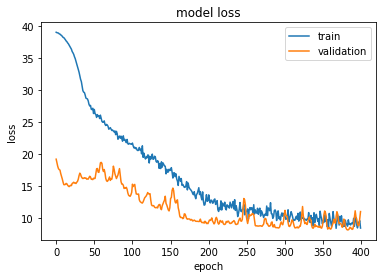

Train MAE: 6.463103078455331
Validation MAE: 11.075201583442404
Forecast MAE: 12.106153327137676


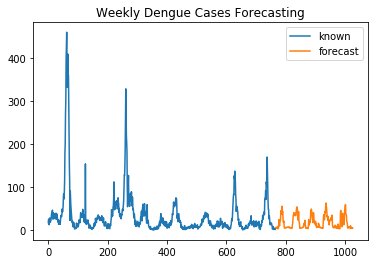

(6.463103078455331, 11.075201583442404, 12.106153327137676)


In [3]:
def get_model(input_shape):
    i = Input(shape=(input_shape))
    print(i.shape)
    m = i
    m =  Flatten()(m)
    m = Dropout(0.1)(m)
    m = Dense(500, activation='relu')(m)
    m = BatchNormalization()(m)
    m = Dense(200, activation='relu')(m)
    m = Dense(1, activation='relu')(m)

    model = Model(inputs=[i], outputs=[m])

    optimizer=optimizers.Adam(lr=5e-5)
    model.compile(optimizer, 'mae')
    return model

hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'verbose':False,
    'plot':False,
    'epochs': 400,
    'city':'sj'
}
stats, df_forecast_sj = experiment(get_model, hyperparameters)
print(stats)

# Submission Code #TODO

(?, 23, 170)
Training...
Train on 228 samples, validate on 122 samples
Epoch 1/400
228/228 - 0s - loss: 8.6218 - val_loss: 6.9146
Epoch 2/400
228/228 - 0s - loss: 8.5717 - val_loss: 7.1675
Epoch 3/400
228/228 - 0s - loss: 8.5472 - val_loss: 7.2430
Epoch 4/400
228/228 - 0s - loss: 8.5375 - val_loss: 7.2842
Epoch 5/400
228/228 - 0s - loss: 8.4346 - val_loss: 7.2913
Epoch 6/400
228/228 - 0s - loss: 8.4117 - val_loss: 7.3588
Epoch 7/400
228/228 - 0s - loss: 8.3979 - val_loss: 7.3232
Epoch 8/400
228/228 - 0s - loss: 8.4285 - val_loss: 7.1782
Epoch 9/400
228/228 - 0s - loss: 8.3756 - val_loss: 7.0269
Epoch 10/400
228/228 - 0s - loss: 8.3081 - val_loss: 6.9580
Epoch 11/400
228/228 - 0s - loss: 8.2551 - val_loss: 6.9281
Epoch 12/400
228/228 - 0s - loss: 8.2478 - val_loss: 6.9149
Epoch 13/400
228/228 - 0s - loss: 8.2207 - val_loss: 6.9025
Epoch 14/400
228/228 - 0s - loss: 8.1276 - val_loss: 6.9035
Epoch 15/400
228/228 - 0s - loss: 8.0977 - val_loss: 6.9066
Epoch 16/400
228/228 - 0s - loss: 8.11

Epoch 136/400
228/228 - 0s - loss: 4.4617 - val_loss: 6.2698
Epoch 137/400
228/228 - 0s - loss: 4.4244 - val_loss: 6.2729
Epoch 138/400
228/228 - 0s - loss: 4.4363 - val_loss: 6.2799
Epoch 139/400
228/228 - 0s - loss: 4.3956 - val_loss: 6.3094
Epoch 140/400
228/228 - 0s - loss: 4.4270 - val_loss: 6.3551
Epoch 141/400
228/228 - 0s - loss: 4.3032 - val_loss: 6.3535
Epoch 142/400
228/228 - 0s - loss: 4.4100 - val_loss: 6.3678
Epoch 143/400
228/228 - 0s - loss: 4.2626 - val_loss: 6.3620
Epoch 144/400
228/228 - 0s - loss: 4.4207 - val_loss: 6.3898
Epoch 145/400
228/228 - 0s - loss: 4.2803 - val_loss: 6.4386
Epoch 146/400
228/228 - 0s - loss: 4.3132 - val_loss: 6.4753
Epoch 147/400
228/228 - 0s - loss: 4.3052 - val_loss: 6.4599
Epoch 148/400
228/228 - 0s - loss: 4.4026 - val_loss: 6.4658
Epoch 149/400
228/228 - 0s - loss: 4.2888 - val_loss: 6.4411
Epoch 150/400
228/228 - 0s - loss: 4.1213 - val_loss: 6.4519
Epoch 151/400
228/228 - 0s - loss: 4.2472 - val_loss: 6.4775
Epoch 152/400
228/228 - 

Epoch 271/400
228/228 - 0s - loss: 2.8807 - val_loss: 7.0275
Epoch 272/400
228/228 - 0s - loss: 3.0862 - val_loss: 6.9474
Epoch 273/400
228/228 - 0s - loss: 2.9668 - val_loss: 6.9028
Epoch 274/400
228/228 - 0s - loss: 2.7684 - val_loss: 6.8814
Epoch 275/400
228/228 - 0s - loss: 2.7629 - val_loss: 6.8600
Epoch 276/400
228/228 - 0s - loss: 3.0153 - val_loss: 6.8335
Epoch 277/400
228/228 - 0s - loss: 2.9541 - val_loss: 6.8205
Epoch 278/400
228/228 - 0s - loss: 2.8564 - val_loss: 6.8921
Epoch 279/400
228/228 - 0s - loss: 2.8013 - val_loss: 7.0123
Epoch 280/400
228/228 - 0s - loss: 2.7278 - val_loss: 7.1020
Epoch 281/400
228/228 - 0s - loss: 2.8924 - val_loss: 7.1953
Epoch 282/400
228/228 - 0s - loss: 2.8355 - val_loss: 7.3361
Epoch 283/400
228/228 - 0s - loss: 2.7525 - val_loss: 7.4211
Epoch 284/400
228/228 - 0s - loss: 2.9031 - val_loss: 7.4076
Epoch 285/400
228/228 - 0s - loss: 2.7471 - val_loss: 7.3188
Epoch 286/400
228/228 - 0s - loss: 2.9327 - val_loss: 7.3373
Epoch 287/400
228/228 - 

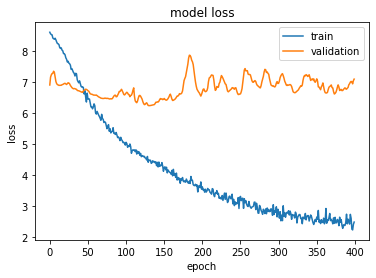

Train MAE: 4.291435780461159
Validation MAE: 7.104504369748909
Forecast MAE: 7.513516133681673


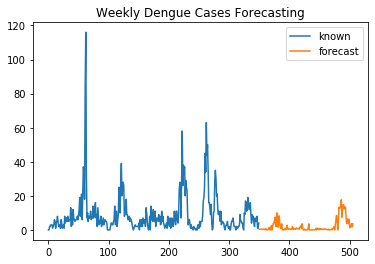

In [4]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'verbose':2,
    'epochs': 400,
    'city':'iq'
}
stats, df_forecast_iq = experiment(get_model, hyperparameters)

In [5]:
submission_dataframe = pd.concat([df_results_sj, df_results_iq])
submission_dataframe.to_csv("submission.csv", index=False)
import drivendata_validator.drivendata_validator as dd
v = dd.DrivenDataValidator()
v.validate('../data/submission_format.csv', 'submission.csv')

NameError: name 'df_results_sj' is not defined